# Desenvolvendo um modelo para predizer a rotatividade

A operadora de comunicações Interconnect gostaria de ser capaz de predizer a rotatividade de seus clientes. Se for descoberto que um usuário está planejando trocar de operadora, a empresa oferecerá-lhe códigos promocionais e opções de plano especiais. A equipe de marketing da Interconnect coletou alguns dados pessoais da sua clientela, incluindo a informação sobre seus planos e contratos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Carregue o arquivo com os dados em um DataFrame
df_contract = pd.read_csv('/datasets/final_provider/contract.csv')
df_internet = pd.read_csv('/datasets/final_provider/internet.csv')
df_personal = pd.read_csv('/datasets/final_provider/personal.csv')
df_phone = pd.read_csv('/datasets/final_provider/phone.csv')

In [3]:
df_contract.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [4]:
df_internet.head(5)

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [5]:
df_personal.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [6]:
df_phone.head(5)

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [7]:
df_contract = df_contract.merge(df_internet, on='customerID', how='left')
df_contract = df_contract.merge(df_personal, on='customerID', how='left')
df = df_contract.merge(df_phone, on='customerID', how='left')

In [8]:
df['target'] = df['EndDate'].apply(lambda x: 1 if x == 'No' else 0)

In [9]:
df.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,gender,SeniorCitizen,Partner,Dependents,MultipleLines,target
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,DSL,No,...,No,No,No,No,Female,0,Yes,No,NaN,1
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,DSL,Yes,...,Yes,No,No,No,Male,0,No,No,No,1
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,DSL,Yes,...,No,No,No,No,Male,0,No,No,No,0
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,DSL,Yes,...,Yes,Yes,No,No,Male,0,No,No,NaN,1
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Fiber optic,No,...,No,No,No,No,Female,0,No,No,No,0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_train, df_test = train_test_split(df,stratify=df['target'], test_size=0.1, random_state=42)

In [12]:
df_train.shape

(6338, 21)

In [13]:
df_test.shape

(705, 21)

# EDA

In [14]:
df.describe()

,MonthlyCharges,SeniorCitizen,target
count,7043.000000,7043.000000,7043.000000
mean,64.761692,0.162147,0.734630
std,30.090047,0.368612,0.441561
min,18.250000,0.000000,0.000000
25%,35.500000,0.000000,0.000000
50%,70.350000,0.000000,1.000000
75%,89.850000,0.000000,1.000000
max,118.750000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
 8   InternetService   5517 non-null   object 
 9   OnlineSecurity    5517 non-null   object 
 10  OnlineBackup      5517 non-null   object 
 11  DeviceProtection  5517 non-null   object 
 12  TechSupport       5517 non-null   object 
 13  StreamingTV       5517 non-null   object 
 14  StreamingMovies   5517 non-null   object 
 15  gender            7043 non-null   object 
 16  SeniorCitizen     7043 non-null   int64  


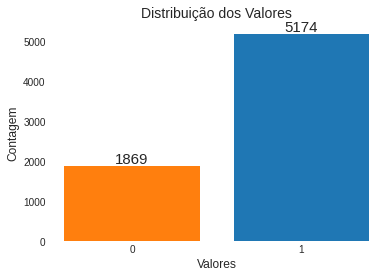

<Figure size 1080x648 with 0 Axes>

In [16]:
coluna = df['target']

# Converta a coluna em uma lista
dados = coluna.tolist()

# Conte os valores na lista e armazene a contagem em uma variável
contagem = [dados.count(0), dados.count(1)]

rotulos = ['0', '1']

# Cores personalizadas
cores = ['#FF7F0E', '#1F77B4'];

# Estilo do gráfico de barras
plt.style.use('seaborn-darkgrid');

# Plotagem do gráfico de barras com cores personalizadas
plt.bar(rotulos, contagem, color=cores);

# Configurações adicionais
plt.xlabel('Valores', fontsize=12);
plt.ylabel('Contagem', fontsize=12);
plt.title('Distribuição dos Valores', fontsize=14);

# Ajuste da largura das barras
plt.bar(rotulos, contagem, color=cores, width=0.5);

# Exibição do valor de cada barra acima dela
for i in range(len(rotulos)):
    plt.text(i, contagem[i], str(contagem[i]), ha='center', va='bottom', fontsize=15)

# Exibição do gráfico com grade
plt.grid(True, linestyle='--', alpha=0.5);

# Remoção das bordas do gráfico
plt.box(False);

# Ajuste do tamanho da figura
plt.figure(figsize=(15, 9));

# Exibição do gráfico
plt.show();

Conduzimos uma EDA, para melhor visualizar e entender os dados verificando a qualidade dos dados, identificando e tratando valores ausentes, outliers e dados inconsistentes.Explorando a distribuição dos dados, utilizando gráficos e estatísticas descritivas para entender a forma como os dados estão distribuídos e Realizandor transformações nos dados, se necessário, para melhorar a qualidade ou adequação dos mesmos para análise posterior.

Podemos observar que há muitos dados que não são uteis para nossa resolução da tarefa mas mesmo assim mostramos de forma geral como distrubuidos, nossa coluna principal é 'target', ela é nosso objetivo. Podemos notar que os dados estão muito desiguais para o treinamento do nosso modelo iremos aplicar algums metodos na tarefa a seguir que garatiram a eficácia do nosso modelo e predizer a rotatividade dos clientes.

# Plano geral de resolução da tarefa

1º Exclusão e preenchimento de algumas colunas para melhor avaliação e otimização do nosso modelo.

2º Garantir que não haja vazamento de dados, assegurar que nosso modelo não ficará inviezado, por isso primeiramente separamos em teste e treinamento.

3º Aplicar a validação cruzada para estimar o quão bem um modelo irá generalizar para dados não vistos, permitindo ter uma estimativa mais confiável do desempenho do modelo em dados.

4º Treinamento do modelo no dataset de treinamento e aplicarmos com dados reais no teste.